In [95]:
# https://github.com/DustinAlandzes/mnist-lenet-keras/blob/master/mnist.py
from sklearn import datasets
import matplotlib.pyplot as plt

In [136]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, Adagrad, Adam
from keras.models import Sequential
from keras.layers.core import Activation, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D




In [137]:
weightsPath = "weights/lenet_weights.hdf5"
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

<Figure size 432x288 with 0 Axes>

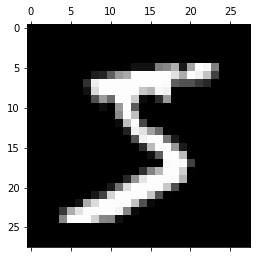

In [138]:
plt.gray()
plt.matshow(X_train[0])
plt.show()

In [115]:
# Channel Last where depth at the last in convolution layer 4 dimesions
# 1. batch_size, height, width, channel_depth
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [108]:
y_train[0]


5

In [109]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [110]:
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)
print (y_train[0:6])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [111]:
opt = SGD(lr=0.01)

In [132]:
class LeNet():
    
    @staticmethod
    def build(width, height, depth, classes):#, weightsPath = None):
        
        # initialize the model
        model = Sequential()
        
        # first set of CONV => RELU => POOL
        model.add(Convolution2D(20, kernel_size=(5, 5), padding='same', input_shape=(height, width, depth)))
        
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # Second set of Conv => Relu => Pool
        model.add(Convolution2D(50, kernel_size=(5, 5), padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # set of FC => Relu layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        
        #if weightsPath is not None:
            
        #model.load_weights(weightsPath)
        return model
            
    
    

In [133]:
# X_train = X_train.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)

In [134]:
model = LeNet.build(width= 28, height=28, depth=1, classes=10)#, weights)

print (model.summary())
model.compile(loss= "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
activation_55 (Activation)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_56 (Activation)   (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 2450)            

In [135]:
model.fit(X_train, y_train, batch_size=128, nb_epoch = 20, verbose = 1, validation_data=(X_test, y_test))

c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 77s 1ms/step - loss: 1.0426 - accuracy: 0.7244 - val_loss: 0.3135 - val_accuracy: 0.9084
Epoch 2/20
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2604 - accuracy: 0.9224 - val_loss: 0.2342 - val_accuracy: 0.9283
Epoch 3/20
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1848 - accuracy: 0.9450 - val_loss: 0.1481 - val_accuracy: 0.9565
Epoch 4/20
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1434 - accuracy: 0.9578 - val_loss: 0.1214 - val_accuracy: 0.9646
Epoch 5/20
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1186 - accuracy: 0.9648 - val_loss: 0.0954 - val_accuracy: 0.9705
Epoch 6/20
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1002 - accuracy: 0.9705 - val_loss: 0.0946 - val_accuracy: 0.9711
Epoch 7/20
60000/60000 [==============================] - 76s 1ms/st

In [139]:

model.save_weights(weightsPath, overwrite=True)
